In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd '/content/drive/My Drive/'

/content/drive/My Drive


In [0]:
!unzip Skydata.zip

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/My Drive/Skydata/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/My Drive/Skydata/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=200, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving Cu.jpg to Cu.jpg
Cu.jpg
[[1.0000000e+00 0.0000000e+00 1.0537979e-11 6.5323230e-37]]


In [0]:
%cd /content/drive/My Drive/reboot_cloud dataset

/content/drive/My Drive/reboot_cloud dataset


In [0]:
!pip install nexmo

     |████████████████████████████████| 2.3MB 14.1MB/s 


/content/drive/My Drive/reboot_cloud dataset
     |████████████████████████████████| 2.3MB 9.5MB/s 


Saving cumulo.jpeg to cumulo (8).jpeg
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Cumulo Nimbus


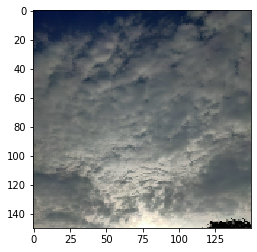

In [0]:
%cd '/content/drive/My Drive/reboot_cloud dataset'
!pip install nexmo

import numpy as np
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing import image
from IPython.display import YouTubeVideo
uploaded = files.upload()

humidity  = 61
waterlevel = 59
raincm = 100
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  saved_model = tf.keras.models.load_model("rps.h5")
  #classes = saved_model.predict(images, batch_size=10)

  output = saved_model.predict(images)
  if (output[0][0] == 1):
    print('Stratus')
  if (output[0][1] == 1):
    print('Cumulus')
  if (output[0][2] == 1):
    print('Cirrus')
  if (output[0][3] == 1):
    print('Cumulo Nimbus')
    if (humidity > 60 and waterlevel > 56 and raincm > 78 ):
      
      YouTubeVideo('-ncJV0tMAjE') 
      import nexmo
      
      client = nexmo.Client(key='ee73506d', secret='6XmrJe9AAlMDmihl')

      client.send_message({
          'from': 'Simplifai',
          'to': '917025725811',
          'text': 'There is a chance of Rain and Thunder Storm. ',
        })






      client = nexmo.Client(key='cf1db017', secret='oAq8ZtjbyVyLhBLg')

      client.send_message({
            'from': 'Simplifai',
            'to': '919895345623',
            'text': 'There is a chance of Rain and Thunder Storm',
        })
plt.imshow(img)

In [0]:
import numpy as np
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  saved_model = tf.keras.models.load_model("rps.h5")
  #classes = saved_model.predict(images, batch_size=10)

  output = saved_model.predict(images)
  if (output[0][0] == 1):
    print('Stratus')
  if (output[0][1] == 1):
    print('Cumulus')
  if (output[0][2] == 1):
    print('Cirrus')
  if (output[0][3] == 1):
    print('Cumulo Nimbus')
    import nexmo

    client = nexmo.Client(key='ee73506d', secret='6XmrJe9AAlMDmihl')

    client.send_message({
          'from': 'Simplifai',
          'to': '917025725811',
          'text': 'There is a chance of Rain and Thunder Storm',
      })
plt.imshow(img)